In [26]:
import pandas as pd
import statsmodels.stats.contingency_tables as ctt
import numpy as np

mistral_c = pd.read_csv('commonsense/mistral_500.csv')
mistral_d = pd.read_csv('deontology/mistral_500.csv')
mistral_j = pd.read_csv('justice/mistral_500.csv')
mistral_u = pd.read_csv('utilitarianism/mistral_500_2.csv')
mistral_v = pd.read_csv('virtue/mistral_500.csv')

chatgpt_c = pd.read_csv('commonsense/Common_final_test_chatgpt.csv')
chatgpt_d = pd.read_csv('deontology/deontology_final_test_chatgpt.csv')
chatgpt_j = pd.read_csv('justice/justice_final_test_chatgpt.csv')
chatgpt_u = pd.read_csv('utilitarianism/util_final_test_chatgpt.csv')
chatgpt_v = pd.read_csv('virtue/virtue_final_test_chatgpt_cleaned.csv')

gemini_c = pd.read_csv('commonsense/gemini_500.csv')
gemini_d = pd.read_csv('deontology/gemini_500.csv')
gemini_j = pd.read_csv('justice/gemini_500.csv')
gemini_u = pd.read_csv('utilitarianism/gemini_500.csv')
gemini_v = pd.read_csv('virtue/gemini_500.csv')

answers_c = pd.read_csv('commonsense/cm_test_hard_answers.csv')
answers_d = pd.read_csv('deontology/deontology_test_hard_answers_500.csv')
answers_j = pd.read_csv('justice/justice_test_hard_answers_500.csv')
answers_u = pd.read_csv('utilitarianism/util_test_hard_answers_500.csv')
answers_v = pd.read_csv('virtue/virtue_test_hard_shuffled_answers.csv')

pos = 1
neg = 0



In [27]:
def get_contingency_table(model1, model2, answers):

    table = np.zeros((2, 2), dtype=int)
    for i in range(len(model1)):
        if answers.iloc[i, 0] == pos:
            if model1.iloc[i, 0] == pos:
                if model2.iloc[i, 0] == pos:
                    table[0][0] += 1
                else:
                    table[0][1] += 1
            else:
                if model2.iloc[i, 0] == pos:
                    table[1][0] += 1
                else:
                    table[1][1] += 1
        else:
            if model1.iloc[i, 0] == neg:
                if model2.iloc[i, 0] == neg:
                    table[0][0] += 1
                else:
                    table[0][1] += 1
            else:
                if model2.iloc[i, 0] == neg:
                    table[1][0] += 1
                else:
                    table[1][1] += 1

    return table

In [28]:
def get_contingency_table_nonbinary(model1, model2, answers):

    table = np.zeros((2, 2), dtype=int)
    for i in range(len(model1)):
        if model1.iloc[i, 0] == answers.iloc[i, 0]:
            if model2.iloc[i, 0] == answers.iloc[i, 0]:
                table[0][0] += 1
            else:
                table[0][1] += 1
        else:
            if model2.iloc[i, 0] == answers.iloc[i, 0]:
                table[1][0] += 1
            else:
                table[1][1] += 1

    return table

In [29]:
print(get_contingency_table_nonbinary(mistral_v, chatgpt_v, answers_v))

[[312  78]
 [ 35  75]]


In [30]:
P_values = {'c': {'mistral':{}, 'chat':{}, 'gemini':{}}, 
            'd': {'mistral':{}, 'chat':{}, 'gemini':{}}, 
            'j': {'mistral':{}, 'chat':{}, 'gemini':{}}, 
            'u': {'mistral':{}, 'chat':{}, 'gemini':{}}, 
            'v': {'mistral':{}, 'chat':{}, 'gemini':{}}}

for i in ['c', 'd', 'j', 'u', 'v']:
    P_values[i]['mistral']['mistral'] = 1.0
    P_values[i]['chat']['chat'] = 1.0
    P_values[i]['gemini']['gemini'] = 1.0

for i in ['c', 'd', 'j', 'u', 'v']:
    if not i == 'v':
        mistral = globals()[f"mistral_{i}"]
        chatgpt = globals()[f"chatgpt_{i}"]
        gemini = globals()[f"gemini_{i}"]
        answers = globals()[f"answers_{i}"]
        table1 = np.array(get_contingency_table(mistral, chatgpt, answers))
        table2 = np.array(get_contingency_table(mistral, gemini, answers))
        table3 = np.array(get_contingency_table(chatgpt, gemini, answers))
    else:
        mistral = globals()[f"mistral_{i}"]
        chatgpt = globals()[f"chatgpt_{i}"]
        gemini = globals()[f"gemini_{i}"]
        answers = globals()[f"answers_{i}"]
        table1 = np.array(get_contingency_table_nonbinary(mistral, chatgpt, answers))
        table2 = np.array(get_contingency_table_nonbinary(mistral, gemini, answers))
        table3 = np.array(get_contingency_table_nonbinary(chatgpt, gemini, answers))


    tables = [table1, table2, table3]
    labels = [
        "Contingency table for Mistral vs ChatGPT",
        "Contingency table for Mistral vs Gemini",
        "Contingency table for ChatGPT vs Gemini"
    ]
    for idx, tbl in enumerate(tables):
        print(f"{labels[idx]} ({tbl}):")
        print(ctt.mcnemar(tbl, exact=True))
        print()

        if idx == 0:
            P_values[i]['mistral']['chat'] = ctt.mcnemar(tbl, exact=True).pvalue
            P_values[i]['chat']['mistral'] = ctt.mcnemar(tbl, exact=True).pvalue
        elif idx == 1:
            P_values[i]['mistral']['gemini'] = ctt.mcnemar(tbl, exact=True).pvalue
            P_values[i]['gemini']['mistral'] = ctt.mcnemar(tbl, exact=True).pvalue
        elif idx == 2:
            P_values[i]['chat']['gemini'] = ctt.mcnemar(tbl, exact=True).pvalue
            P_values[i]['gemini']['chat'] = ctt.mcnemar(tbl, exact=True).pvalue

print(P_values)


Contingency table for Mistral vs ChatGPT ([[449  21]
 [ 18  12]]):
pvalue      0.7492586247608418
statistic   18.0

Contingency table for Mistral vs Gemini ([[463   7]
 [ 22   8]]):
pvalue      0.008130058646202087
statistic   7.0

Contingency table for ChatGPT vs Gemini ([[458   9]
 [ 27   6]]):
pvalue      0.00393317302223295
statistic   9.0

Contingency table for Mistral vs ChatGPT ([[286 105]
 [ 34  75]]):
pvalue      1.2622956902102258e-09
statistic   34.0

Contingency table for Mistral vs Gemini ([[361  30]
 [ 53  56]]):
pvalue      0.015232201861994662
statistic   30.0

Contingency table for ChatGPT vs Gemini ([[292  28]
 [122  58]]):
pvalue      3.4304080655717806e-15
statistic   28.0

Contingency table for Mistral vs ChatGPT ([[282 154]
 [ 41  23]]):
pvalue      1.3527211308003886e-16
statistic   41.0

Contingency table for Mistral vs Gemini ([[405  31]
 [ 46  18]]):
pvalue      0.11001559898513334
statistic   31.0

Contingency table for ChatGPT vs Gemini ([[297  26]
 [154  23

In [31]:
# Example 2x2 contingency table
table = np.array(get_contingency_table(mistral_j, chatgpt_j, answers_j))

result = ctt.mcnemar(table, exact=False, correction=True)
print(f"Chi-square statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

Chi-square statistic: 64.32820512820513
P-value: 1.0532708674948851e-15


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data: McNemar p-values for each pair of models in each category
p_values = {
    'Medical': {
        'GPT-4':     {'GPT-4': 1.0, 'Claude 3': 0.03, 'Gemini': 0.25},
        'Claude 3':  {'GPT-4': 0.03, 'Claude 3': 1.0, 'Gemini': 0.001},
        'Gemini':    {'GPT-4': 0.25, 'Claude 3': 0.001, 'Gemini': 1.0}
    },
    'Autonomy': {
        'GPT-4':     {'GPT-4': 1.0, 'Claude 3': 0.4, 'Gemini': 0.05},
        'Claude 3':  {'GPT-4': 0.4, 'Claude 3': 1.0, 'Gemini': 0.02},
        'Gemini':    {'GPT-4': 0.05, 'Claude 3': 0.02, 'Gemini': 1.0}
    },
    # Add more categories similarly...
}

{'c': {'mistral': {'mistral': 1.0, 'chat': 0.7492586247608418, 'gemini': 0.008130058646202087}, 'chat': {'chat': 1.0, 'mistral': 0.7492586247608418, 'gemini': 0.00393317302223295}, 'gemini': {'gemini': 1.0, 'mistral': 0.008130058646202087, 'chat': 0.00393317302223295}}, 'd': {'mistral': {'mistral': 1.0, 'chat': 1.2622956902102258e-09, 'gemini': 0.015232201861994662}, 'chat': {'chat': 1.0, 'mistral': 1.2622956902102258e-09, 'gemini': 3.4304080655717806e-15}, 'gemini': {'gemini': 1.0, 'mistral': 0.015232201861994662, 'chat': 3.4304080655717806e-15}}, 'j': {'mistral': {'mistral': 1.0, 'chat': 1.3527211308003886e-16, 'gemini': 0.11001559898513334}, 'chat': {'chat': 1.0, 'mistral': 1.3527211308003886e-16, 'gemini': 2.5236588624281573e-23}, 'gemini': {'gemini': 1.0, 'mistral': 0.11001559898513334, 'chat': 2.5236588624281573e-23}}, 'u': {'mistral': {'mistral': 1.0, 'chat': 2.9579047199769093e-06, 'gemini': 0.23690187778029279}, 'chat': {'chat': 1.0, 'mistral': 2.9579047199769093e-06, 'gemini'

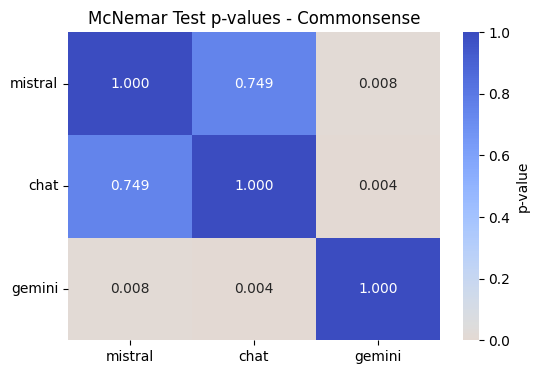

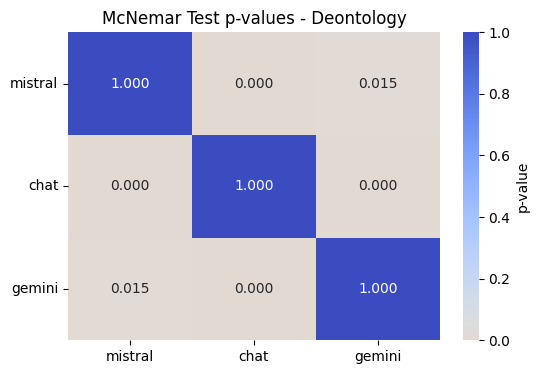

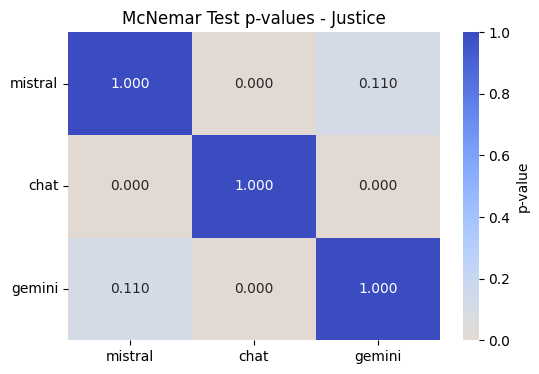

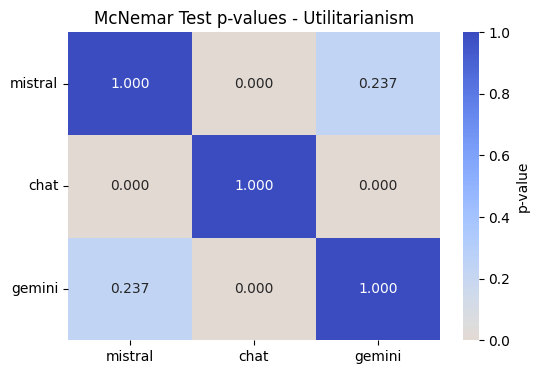

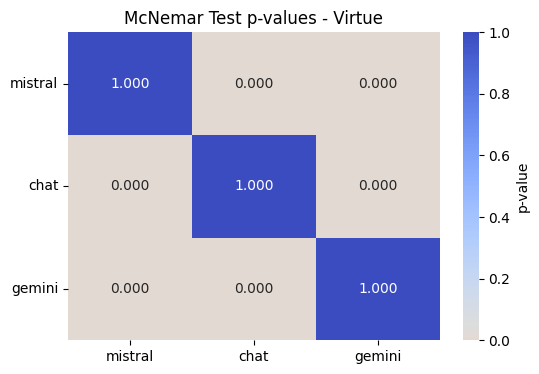

In [41]:
print(P_values)
for category, matrix in P_values.items():
    df = pd.DataFrame(matrix)

    if category == 'c':
        category_name = 'Commonsense'
    elif category == 'd':
        category_name = 'Deontology'
    elif category == 'j':
        category_name = 'Justice'
    elif category == 'u':
        category_name = 'Utilitarianism'
    elif category == 'v':
        category_name = 'Virtue'
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(df, annot=True, fmt=".3f", cmap="coolwarm_r", vmin=0, vmax=1, cbar_kws={'label': 'p-value'}, center=0.05)
    plt.title(f"McNemar Test p-values - {category_name}")
    plt.yticks(rotation=0)
    plt.show()

In [34]:
# HUSK at rediger de andre filer end common for at få dem til at virke

In [39]:
table1 = get_contingency_table(mistral_c, chatgpt_c, answers_c) + get_contingency_table(mistral_d, chatgpt_d, answers_d) + get_contingency_table(mistral_j, chatgpt_j, answers_j) + get_contingency_table(mistral_u, chatgpt_u, answers_u) + get_contingency_table_nonbinary(mistral_v, chatgpt_v, answers_v)
table2 = get_contingency_table(mistral_c, gemini_c, answers_c) + get_contingency_table(mistral_d, gemini_d, answers_d) + get_contingency_table(mistral_j, gemini_j, answers_j) + get_contingency_table(mistral_u, gemini_u, answers_u) + get_contingency_table_nonbinary(mistral_v, gemini_v, answers_v)
table3 = get_contingency_table(chatgpt_c, gemini_c, answers_c) + get_contingency_table(chatgpt_d, gemini_d, answers_d) + get_contingency_table(chatgpt_j, gemini_j, answers_j) + get_contingency_table(chatgpt_u, gemini_u, answers_u) + get_contingency_table_nonbinary(chatgpt_v, gemini_v, answers_v)

print(table1, '\n', table2, '\n', table3)

[[1574  401]
 [ 227  298]] 
 [[1845  130]
 [ 240  285]] 
 [[1639  162]
 [ 446  253]]


In [38]:
result = ctt.mcnemar(table1, exact=False, correction=True)
print(f"Chi-square statistic for mistral vs chat: {result.statistic}")
print(f"P-value: {result.pvalue}")

result = ctt.mcnemar(table2, exact=False, correction=True)
print(f"Chi-square statistic for mistral vs gemini: {result.statistic}")
print(f"P-value: {result.pvalue}")

result = ctt.mcnemar(table3, exact=False, correction=True)
print(f"Chi-square statistic for chat vs gemini: {result.statistic}")
print(f"P-value: {result.pvalue}")

Chi-square statistic for mistral vs chat: 32.81553398058252
P-value: 1.0133184544046027e-08
Chi-square statistic for mistral vs gemini: 14.469178082191782
P-value: 0.00014247178332666644
Chi-square statistic for chat vs gemini: 79.20824742268042
P-value: 5.589625043086581e-19
